In [1]:
# For Google Colab Use
COLAB = False
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Coding/Projects/MarketMakingAgents/market-making-agents'
    #!git fetch origin
    #!git reset --hard origin/master
    #!git pull
    #!git checkout .

In [ ]:
if COLAB:
    %load_ext tensorboard
    %tensorboard --logdir runs

    # Clear any logs from previous runs
    !rm -rf ./runs/

    %reload_ext tensorboard
    # Note you can inspect the tensorboard and get url to open in new tab

In [2]:
from Source.Agents.DeepQNetwork import DQNMarketMaker
from Source.Agents.Utils.DataPlotter import DataPlotter

import gym
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()    

In [4]:
NUMBER_EPISODES = 1000

env = gym.make("CartPole-v0")

numberActions = env.action_space.n
stateSpaceSize = env.observation_space.shape[0]
actionSpace = list(range(numberActions))

dqn = DQNMarketMaker(actionSpace, stateSpaceSize)


DQN using cpu


In [5]:
dataPlotter = DataPlotter()

prevMax = 0.0

for episodeNumber in range(NUMBER_EPISODES):
    state = env.reset()
    episodeReturn = 0.0
    episodeCounter = 0
    done = False

    while not done:
        episodeCounter += 1

        action, actionIndex = dqn.getSkewAction(state)
        nextState, reward, done, _ = env.step(action)
        episodeReturn += reward
        dqn.inputPostTrade(state, actionIndex, reward, done, nextState)
        state = nextState


    # End of episode:
    writer.add_scalar("episodeReturn", episodeReturn, episodeNumber)
    writer.flush() 
    
    dataPlotter.add("episodeReturn", episodeReturn)
    newMean = np.mean(dataPlotter.get("episodeReturn")[-10:])

    if newMean > prevMax:
        prevMax = newMean
        print("New Max Found. Episode: {} EpisodeReturn: {} runningMean: {} Epsilon: {}".format(episodeNumber, episodeReturn, newMean, dqn.getEpsilon()))   
    
    if newMean > 199:
        print("Environment Solved!")
        break




New Max Found. Episode: 0 EpisodeReturn: 10.0 runningMean: 10.0 Epsilon: 0.5
New Max Found. Episode: 2 EpisodeReturn: 13.0 runningMean: 11.0 Epsilon: 0.5
New Max Found. Episode: 5 EpisodeReturn: 25.0 runningMean: 13.166666666666666 Epsilon: 0.5
New Max Found. Episode: 13 EpisodeReturn: 15.0 runningMean: 13.2 Epsilon: 0.47607889299150724
New Max Found. Episode: 14 EpisodeReturn: 14.0 runningMean: 13.6 Epsilon: 0.4694569388517746
New Max Found. Episode: 307 EpisodeReturn: 34.0 runningMean: 14.3 Epsilon: 0.02149960470825366
New Max Found. Episode: 312 EpisodeReturn: 15.0 runningMean: 14.6 Epsilon: 0.020085547500601725
New Max Found. Episode: 313 EpisodeReturn: 22.0 runningMean: 15.8 Epsilon: 0.019648274431716312
New Max Found. Episode: 315 EpisodeReturn: 35.0 runningMean: 17.9 Epsilon: 0.01880208004865929
New Max Found. Episode: 316 EpisodeReturn: 14.0 runningMean: 18.2 Epsilon: 0.018540555092088646
New Max Found. Episode: 318 EpisodeReturn: 15.0 runningMean: 18.3 Epsilon: 0.0176888939864

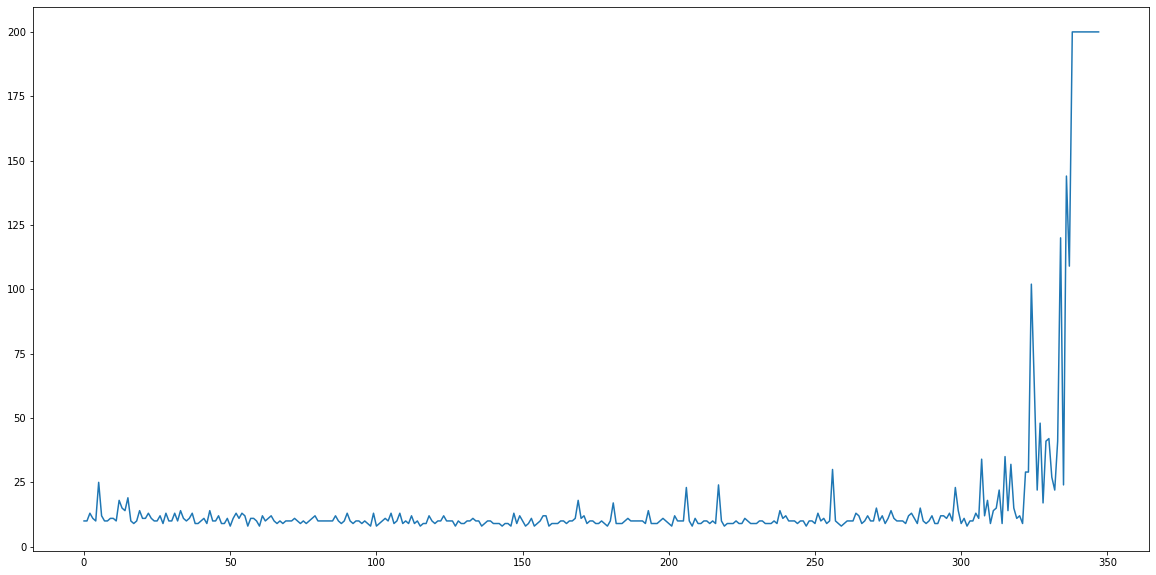

In [6]:
dataPlotter.plot("episodeReturn")

In [9]:

%load_ext tensorboard
%tensorboard --logdir runs/ --host localhost --port 8088
%reload_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
